In [12]:
import matplotlib.pyplot as plt
import json
import os
import pandas as pd
import seaborn as sns
import numpy as np

In [19]:

folder = ".experiments/a1812-06127/mnist-part1000_drp0.0_lr0.03_seed42"
metrics = []

info_file = f"{folder}/info.json"
with open(info_file, "r") as f:
    info = json.load(f)

for filename in os.listdir(folder):
    if filename.endswith(".metrics"):
        with open(os.path.join(folder, filename), "r") as f:
            metrics.append(json.load(f))

del f
del filename
del folder

print(info["partition_nsamples"]['ds-909'])
print(info["partition_nsamples_per_class"]['ds-909'])

2
[2, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [20]:

def extract_contrib(contributors, pid):
    # fiter all text and keep numbers
    pid = pid.strip().replace("ds-", "")
    pid = int(pid)

    for contrib in contributors:
        if contrib["client"][0] == pid:
            return contrib
    return {}

flat_metrics = [
    {
        "version": m["version"],
        "accuracy": m["accuracy"],
        "partitionID": pid,
        "partitionAccuracy": acc,
        "trainSamples": extract_contrib(m["contributors"], pid).get("train_samples", 0),
        # calculate variance over in info["partition_nsamples_per_class"][pid]
        "partitionClassVariance": np.var(info["partition_nsamples_per_class"][pid]),
    }
    for m in metrics
    for pid, acc in m["groups"].items()
]



df = pd.DataFrame(flat_metrics)
df["partitionID"] = df["partitionID"].astype("category")
df = df.sort_values("version")

df["partitionVariance"] = df["partitionID"].map(
    df.groupby("partitionID", observed=False)["partitionAccuracy"].var()
)
df['samples'] = df['partitionID'].map(info['partition_nsamples'])
df['totalTrainSamples'] = (
    df.groupby('partitionID', observed=False)['trainSamples']
      .transform('sum')
)
# get top 5 less variance partitions
top_low_variance = (
    df.drop_duplicates(subset="partitionID")
      .nsmallest(100, "partitionVariance")
)

# Get top 5 highest variance partitions (unique partitionID)
top_high_variance = (
    df.drop_duplicates(subset="partitionID")
      .nlargest(100, "partitionVariance")
)

top_high_contribs = (
    df.drop_duplicates(subset="partitionID")
      .nlargest(100, "totalTrainSamples")
)

top_low_contribs = (
    df.drop_duplicates(subset="partitionID")
      .nsmallest(100, "totalTrainSamples")
)

print("Top partitions with less variance:")
display(top_low_variance)

print("Top partitions with high variance:")
display(top_high_variance)

print("Top partitions with high contributions:")
display(top_high_contribs)

print("Top partitions with low contributions:")
display(top_low_contribs)


Top partitions with less variance:


,version,accuracy,partitionID,partitionAccuracy,trainSamples,partitionClassVariance,partitionVariance,samples,totalTrainSamples
174518,1,0.102804,ds-565,1.000000,0,0.09,0.000000,1,18
174785,1,0.102804,ds-805,0.500000,0,0.36,0.001250,2,11
174416,1,0.102804,ds-473,0.500000,0,0.16,0.002487,2,52
174061,1,0.102804,ds-153,0.500000,0,0.36,0.003712,2,20
174445,1,0.102804,ds-5,0.000000,0,0.36,0.003712,2,42
...,...,...,...,...,...,...,...,...,...
174115,1,0.102804,ds-201,0.184783,0,691.36,0.011284,92,3276
174904,1,0.102804,ds-912,0.052632,0,32.49,0.011289,19,652
174042,1,0.102804,ds-136,0.166667,0,2.24,0.011306,6,54
174034,1,0.102804,ds-129,0.000000,0,1.44,0.011426,4,64


Top partitions with high variance:


,version,accuracy,partitionID,partitionAccuracy,trainSamples,partitionClassVariance,partitionVariance,samples,totalTrainSamples
174500,1,0.102804,ds-549,0.000000,0,0.09,0.250025,1,18
174690,1,0.102804,ds-72,0.000000,0,0.09,0.247010,1,9
174134,1,0.102804,ds-219,0.000000,0,0.09,0.241206,1,18
174439,1,0.102804,ds-494,0.000000,0,0.09,0.241206,1,9
174177,1,0.102804,ds-258,0.000000,0,0.09,0.240176,1,18
...,...,...,...,...,...,...,...,...,...
174413,1,0.102804,ds-470,0.000000,0,0.16,0.087783,2,14
174610,1,0.102804,ds-648,0.000000,0,0.81,0.087504,3,0
174122,1,0.102804,ds-208,0.000000,0,9.00,0.087280,10,246
174401,1,0.102804,ds-46,0.500000,0,0.36,0.086878,2,14


Top partitions with high contributions:


,version,accuracy,partitionID,partitionAccuracy,trainSamples,partitionClassVariance,partitionVariance,samples,totalTrainSamples
174032,1,0.102804,ds-127,0.067416,0,613.29,0.023289,89,4770
174115,1,0.102804,ds-201,0.184783,0,691.36,0.011284,92,3276
174816,1,0.102804,ds-833,0.169811,0,969.64,0.025612,106,2847
174912,1,0.102804,ds-92,0.169231,0,380.25,0.011022,65,2340
174275,1,0.102804,ds-346,0.181818,0,423.21,0.031438,77,2079
...,...,...,...,...,...,...,...,...,...
174598,1,0.102804,ds-637,0.032258,0,74.89,0.032428,31,279
174969,1,0.102804,ds-971,0.032258,0,60.49,0.011250,31,275
174927,1,0.102804,ds-933,0.187500,0,13.44,0.017162,16,272
174194,1,0.102804,ds-273,0.125000,0,23.04,0.017244,16,270


Top partitions with low contributions:


,version,accuracy,partitionID,partitionAccuracy,trainSamples,partitionClassVariance,partitionVariance,samples,totalTrainSamples
174965,1,0.102804,ds-968,0.105263,0,28.89,0.056615,19,0
174967,1,0.102804,ds-97,0.103448,0,64.89,0.021064,29,0
174995,1,0.102804,ds-995,0.500000,0,0.36,0.007437,2,0
174939,1,0.102804,ds-944,0.000000,0,0.36,0.029623,2,0
174943,1,0.102804,ds-948,0.000000,0,0.84,0.029516,4,0
...,...,...,...,...,...,...,...,...,...
174715,1,0.102804,ds-742,0.000000,0,0.36,0.061803,2,0
174832,1,0.102804,ds-848,0.000000,0,17.64,0.050487,14,0
174833,1,0.102804,ds-849,0.000000,0,0.41,0.059006,3,0
174834,1,0.102804,ds-85,0.000000,0,0.81,0.089604,3,0


/tmp/ipykernel_3675088/2504274418.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = df.groupby("partitionID").agg(


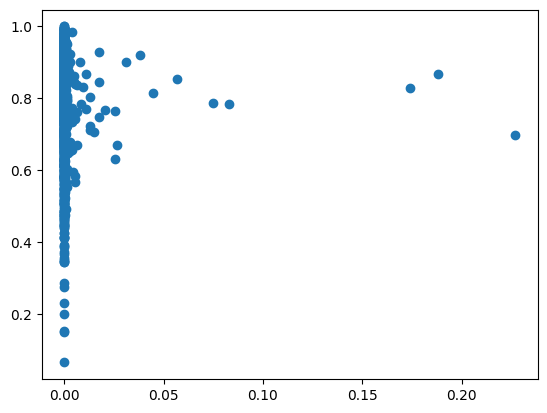

In [15]:
agg_df = df.groupby("partitionID").agg(
    partitionClassVariance=('partitionClassVariance', 'mean'),
    partitionAccuracy=('partitionAccuracy', 'mean'),
    participation_count=("trainSamples", lambda x: (x > 0).sum()),
)

maxClassVariance = agg_df['partitionClassVariance'].max()
minClassVariance = agg_df['partitionClassVariance'].min()
# normalize
agg_df['partitionClassVariance'] = (agg_df['partitionClassVariance'] - minClassVariance) / (maxClassVariance - minClassVariance)

plt.scatter(
    agg_df['partitionClassVariance'] * agg_df['participation_count'],
    agg_df['partitionAccuracy'],
)

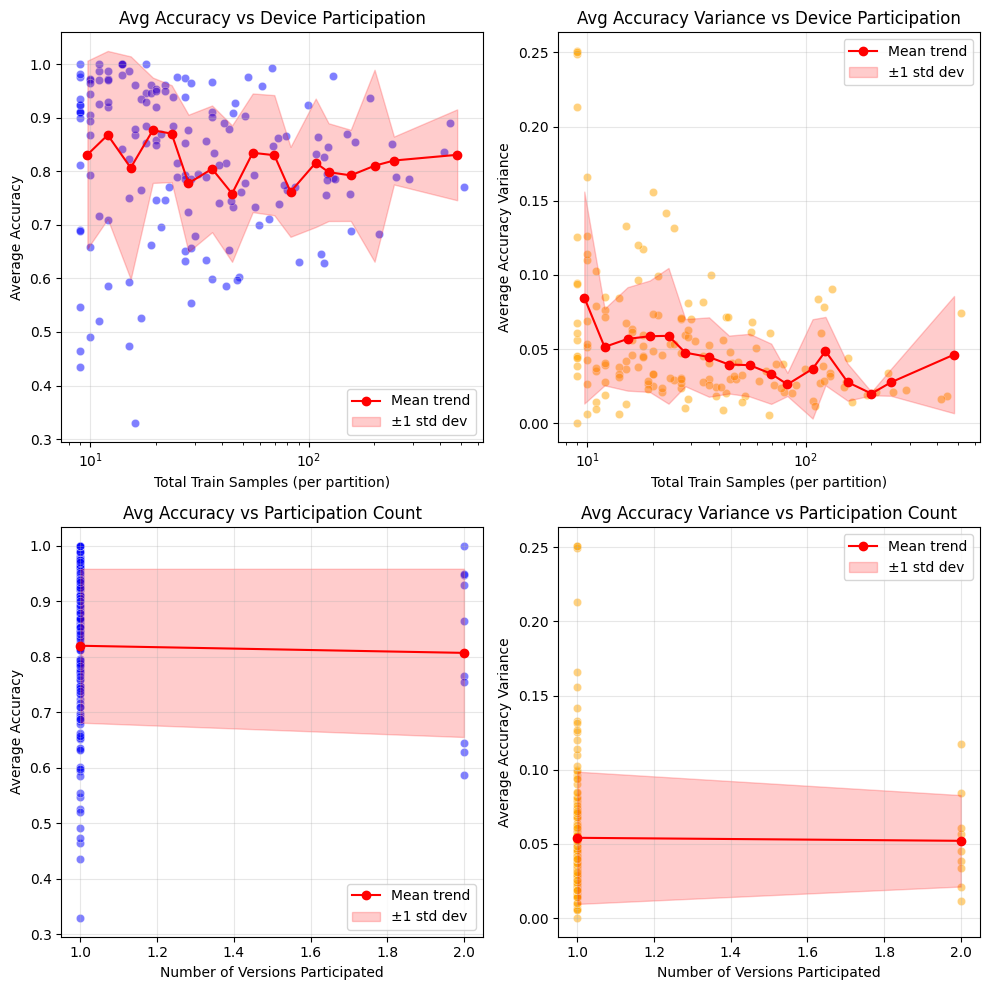

In [16]:
# ---------------------------
# Helper: Aggregate and bin
# ---------------------------
def aggregate_and_bin(df, group_col, x_col, y_cols, bins, log=False):
    agg_df = (
        df.groupby(group_col, observed=True)  # Explicit observed=True
        .agg({y_cols[0]: "mean", y_cols[1]: "mean", x_col: "sum"})
        .reset_index()
    )
    agg_df = agg_df[agg_df[x_col] > 0]

    if log:
        bin_edges = np.logspace(
            np.log10(agg_df[x_col].min()), np.log10(agg_df[x_col].max()), bins
        )
    else:
        bin_edges = np.linspace(agg_df[x_col].min(), agg_df[x_col].max(), bins)

    agg_df["bin"] = pd.cut(agg_df[x_col], bin_edges, include_lowest=True)

    bin_stats = (
        agg_df.groupby("bin", observed=True)  # Explicit observed=True
        .agg(
            mean_x=(x_col, "mean"),
            mean_y1=(y_cols[0], "mean"),
            std_y1=(y_cols[0], "std"),
            mean_y2=(y_cols[1], "mean"),
            std_y2=(y_cols[1], "std"),
        )
        .dropna()
    )
    return agg_df, bin_stats


# ---------------------------
# Helper: Plot metric
# ---------------------------
def plot_metric(ax, df, bin_stats, x_col, y_col, mean_col, std_col, title, xlabel, ylabel, log=False, color="blue"):
    sns.scatterplot(data=df, x=x_col, y=y_col, alpha=0.5, ax=ax, color=color)
    ax.plot(bin_stats["mean_x"], bin_stats[mean_col], color="red", marker="o", label="Mean trend")
    ax.fill_between(
        bin_stats["mean_x"],
        bin_stats[mean_col] - bin_stats[std_col],
        bin_stats[mean_col] + bin_stats[std_col],
        color="red",
        alpha=0.2,
        label="±1 std dev"
    )
    if log:
        ax.set_xscale("log")
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True, alpha=0.3)
    ax.legend()


sliced_df = df[df["version"] > 30]

# ---------------------------
# 1️⃣ Total samples analysis
# ---------------------------
df_avg, bin_means_samples = aggregate_and_bin(
    sliced_df,
    group_col="partitionID",
    x_col="trainSamples",
    y_cols=["partitionAccuracy", "partitionVariance"],
    bins=20,
    log=True
)

# ---------------------------
# 2️⃣ Participation count analysis
# ---------------------------
df_participation = (
    sliced_df.groupby("partitionID", observed=True)
    .agg(
        participation_count=("trainSamples", lambda x: (x > 0).sum()),
        partitionAccuracy=("partitionAccuracy", "mean"),
        partitionVariance=("partitionVariance", "mean")
    )
    .reset_index()
)

df_part, bin_means_count = aggregate_and_bin(
    df_participation,
    group_col="partitionID",
    x_col="participation_count",
    y_cols=["partitionAccuracy", "partitionVariance"],
    bins=15,
    log=False
)

# ---------------------------
# 📊 Single 2×2 Figure
# ---------------------------
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

plot_metric(
    axes[0], df_avg, bin_means_samples,
    x_col="trainSamples", y_col="partitionAccuracy",
    mean_col="mean_y1", std_col="std_y1",
    title="Avg Accuracy vs Device Participation",
    xlabel="Total Train Samples (per partition)",
    ylabel="Average Accuracy",
    log=True
)

plot_metric(
    axes[1], df_avg, bin_means_samples,
    x_col="trainSamples", y_col="partitionVariance",
    mean_col="mean_y2", std_col="std_y2",
    title="Avg Accuracy Variance vs Device Participation",
    xlabel="Total Train Samples (per partition)",
    ylabel="Average Accuracy Variance",
    log=True,
    color="orange"
)

plot_metric(
    axes[2], df_part, bin_means_count,
    x_col="participation_count", y_col="partitionAccuracy",
    mean_col="mean_y1", std_col="std_y1",
    title="Avg Accuracy vs Participation Count",
    xlabel="Number of Versions Participated",
    ylabel="Average Accuracy"
)

plot_metric(
    axes[3], df_part, bin_means_count,
    x_col="participation_count", y_col="partitionVariance",
    mean_col="mean_y2", std_col="std_y2",
    title="Avg Accuracy Variance vs Participation Count",
    xlabel="Number of Versions Participated",
    ylabel="Average Accuracy Variance",
    color="orange"
)

plt.tight_layout()
plt.show()

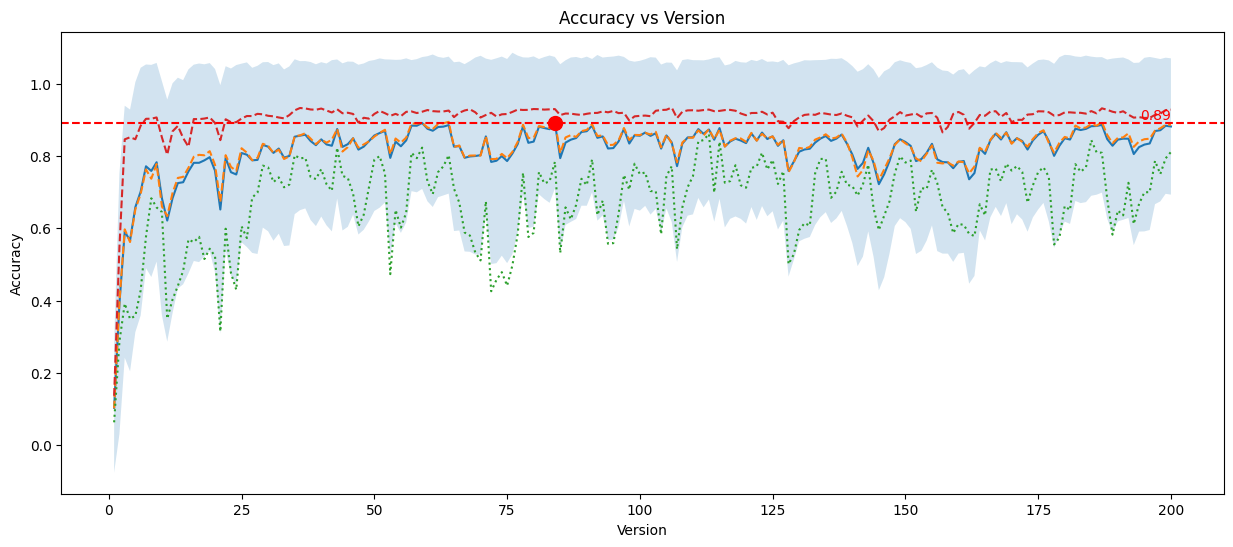

In [21]:

# plot only highest variance partition accuracy
thv_df = df[df["partitionID"].isin(top_high_variance["partitionID"])]
thv_df = thv_df[['version', 'partitionAccuracy']]
thv_df = thv_df.rename(columns={"partitionAccuracy": "accuracy"})
thv_df = thv_df.groupby("version").agg({
    "accuracy": "mean"
}).reset_index()

tlv_df = df[df["partitionID"].isin(top_low_variance["partitionID"])]
tlv_df = tlv_df[['version', 'partitionAccuracy']]
tlv_df = tlv_df.rename(columns={"partitionAccuracy": "accuracy"})
tlv_df = tlv_df.groupby("version").agg({
    "accuracy": "mean"
}).reset_index()


agg_df = df.copy()
agg_df = agg_df[["version", "partitionAccuracy", 'totalTrainSamples']]
agg_df = agg_df.rename(columns={"partitionAccuracy": "accuracy"})
agg_df['waccuracy'] = agg_df['accuracy'] * agg_df['totalTrainSamples']
agg_df['accuracy_std'] = agg_df['accuracy']
agg_df = agg_df.groupby("version").agg({
    "accuracy": "mean",
    "accuracy_std": 'std',
    "waccuracy": "sum",
    "totalTrainSamples": "sum"
}).reset_index()
agg_df["waccuracy"] = agg_df["waccuracy"] / agg_df["totalTrainSamples"]

max_idx = agg_df["accuracy"].idxmax()
max_version = agg_df.loc[max_idx, "version"]
max_acc = agg_df.loc[max_idx, "accuracy"]

fig = plt.figure(figsize=(15, 6))
plt.plot(agg_df["version"], agg_df["accuracy"])
plt.plot(agg_df["version"], agg_df["waccuracy"], label="Weighted Accuracy", linestyle="--")
plt.plot(thv_df["version"], thv_df["accuracy"], label="Top 5 High Variance Partitions", linestyle=":")
plt.plot(tlv_df["version"], tlv_df["accuracy"], label="Top 5 Low Variance Partitions", linestyle="--")

plt.fill_between(agg_df["version"], agg_df["accuracy"] - agg_df["accuracy_std"], agg_df["accuracy"] + agg_df["accuracy_std"], alpha=0.2)

plt.axhline(y=max_acc, color="red", linestyle="--", label=f"Max Accuracy: {max_acc:.2f}")
plt.scatter(max_version, max_acc, color="red", s=100, zorder=5)
plt.text(
    agg_df["version"].iloc[-1],
    max_acc,
    f"{max_acc:.2f}",
    color="red",
    va="bottom",
    ha="right",
)

plt.xlabel("Version")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Version")
plt.show()